### Imports

In [1]:
# Your Imports here
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import joblib
from sklearn.naive_bayes import MultinomialNB


### 1- Authentication

In [2]:
# Authentication
auth_data = pd.read_csv("env.csv", header=None)[1]
consumerKey = auth_data[0]
consumerSecret = auth_data[1]
accessToken = auth_data[2]
accessTokenSecret = auth_data[3]
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
tweets_df = pd.read_csv('tweets.csv').drop("Unnamed: 0", axis=1)

### 2- Data Wrangling and EDA

In [4]:
keyword = "data analysis"
noOfTweet = 100
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

tweets_dictionary = {'tweets':[]}

for tweet in tweets:
    tweets_dictionary['tweets'].append(tweet.text)

In [5]:
tweets_df = pd.DataFrame(tweets_dictionary)

In [6]:
data = pd.read_csv("sentiment_data.csv")
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [7]:
data = data.drop('package_name', axis=1)

### 2- Data Wrangling and EDA

In [8]:
data['review'] = data['review'].str.strip().str.lower()

### 3- Modeling (Naive Bayes)

In [9]:
# Split into training and testing data
x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [10]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()



In [11]:
model = MultinomialNB()
model.fit(x, y)

model.score(x_test, y_test)


0.8565022421524664

### 4- Predection & Explantory Data Analysis

In [12]:
predicted_polarities = tweets_df.tweets.apply(lambda row: model.predict(vec.transform([row]))[0])

In [13]:
positive = predicted_polarities.mean()
negative = 1- positive

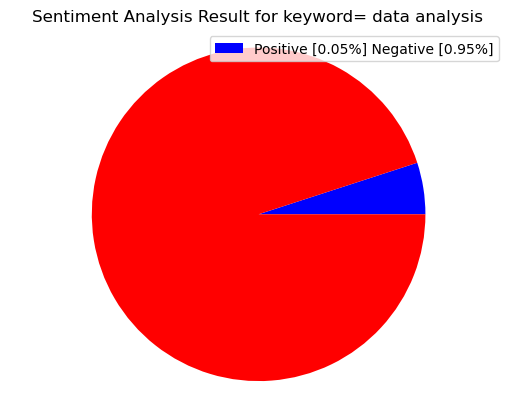

In [16]:
#Creating PieCart
labels = ["Positive ["+str(positive)+"%]" " Negative ["+str(negative)+"%]"]
sizes = [positive, negative]
colors = ["blue","red"]
patches, texts = plt.pie(sizes,colors=colors)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis("equal")
plt.show()

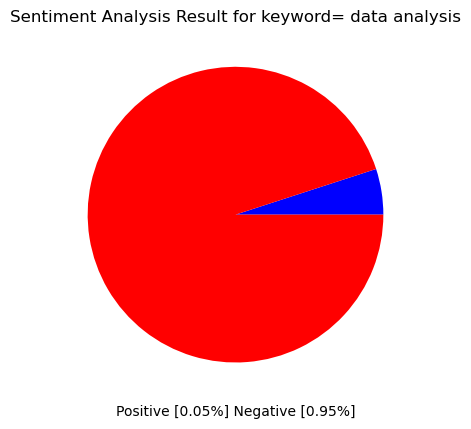

In [23]:

plt.pie([positive, negative],colors=['blue', 'red']);
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.xlabel("Positive ["+str(positive)+"%]" " Negative ["+str(negative)+"%]");